### TRABAJO PRACTICO FINAL
Alumnos:
- Maria Victoria Teran Beiza
- Fernando Vasconcelos
- Gustavo Uñapillco
- Lara Rosenberg

#### INTRODUCCION
Para el presente trabajo se utilizó un dataset de encuestas de satisfacción de una aerolinea comercial, obtenido de Kaggle: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

El mismo contiene la siguiente información:
- id: Identificador del cliente.
- Gender: Género del pasajero (Female= femenino, Male=masculino).
- Customer Type: Tipo de cliente (Loyal customer, disloyal customer).
- Age: Edad del pasajero.
- Type of Travel: Propósito del vuelo para el pasajero (Personal Travel, Business Travel).
- Class: Clase en el vuelo a la que pertenece el pasajero (Business, Eco, Eco Plus).
- Flight distance: Distancia del vuelo.
- Inflight wifi service: Nivel de satisfacción con el servicio de wifi a bordo (0:Not Applicable;1-5).
- Departure/Arrival time convenient: Nivel de satisfacción de la hora de salida/llegada.
- Ease of Online booking: Nivel de satisfacción de la reserva online.
- Gate location: Nivel de satisfacción con la ubicación de la puerta
- Food and drink: Nivel de satisfacción con la comida y la bebida.
- Online boarding: Nivel de satisfacción del embarque online.
- Seat comfort: Nivel de satisfacción con la comodidad del asiento.
- Inflight entertainment: Nivel de satisfacción con el servicio de entretenimiento a bordo.
- On-board service: Nivel de satisfacción a bordo.
- Leg room service: Nivel de satisfacción con el espacio para las piernas.
- Baggage handling: Nivel de satisfacción del manejo de equipaje.
- Check-in service: Nivel de satisfacción con el servicio de check-in.
- Inflight service: Nivel de satisfacción con el servicio en el vuelo.
- Cleanliness: Nivel de satisfacción con la limpieza.
- Departure Delay in Minutes: Minutos de atraso en la salida.
- Arrival Delay in Minutes: Minutos de atraso en la arribo.
- Satisfaction: Nivel de satisfacción con la aerolinea (Satisfaction, neutral or dissatisfaction).

Lo más importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si el usuario estará o no satisfecho con la aerolinea en determinado vuelo. Tambien es entender qué variables son las que mas afectan la conformidad o disconformidad del usuario, a efectos de que la aerolinea pueda accionar sobre las mismas.

In [2]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#configuraciones generales
pd.set_option('display.max_columns', None)

randon_generator = np.random.default_rng(45)

In [3]:
#Importamos el dataset de train
df = pd.read_csv('data/train.csv')
print(df.shape)
#Importamos el dataset de test
df_t = pd.read_csv('data/test.csv')
print(df.shape)

(103904, 25)
(103904, 25)


In [4]:
#Unimos ambos datasets para separarlos por nuestro lado
df_total = pd.concat([df, df_t]).sample(frac=1, random_state=randon_generator)

# Borramos la columna Unnamed
df_total.drop(columns='Unnamed: 0', inplace=True)
print(df_total.shape)

(129880, 24)


In [5]:
df_total.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Se puede notar que en general, el tiempo de demora tanto en el arribo como en la salida es en el 75% de los casos, menor a los 15 minutos, y se observa que el maximo es de 1600 minutos aproximadamente, lo que implica que en esta variable encontraremos outliers.

In [6]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 76762 to 16174
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880

Verificamos si alguna feature tiene valores nulos

In [8]:
missing_series = df_total[df_total.columns[df_total.isnull().any()]].isnull().sum()
print("La columna {column_name} tiene {null_count}".format(column_name=missing_series.index[0], null_count=missing_series[0]))

La columna Arrival Delay in Minutes tiene 393


In [11]:
print(df_total.nunique())

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

In [ ]:
X = df_total.drop('satisfaction', axis=1)
y = df_total['satisfaction']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(103904, 24) (25976, 24) (103904,) (25976,)


In [ ]:
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
print(df_train.shape, df_test.shape)

(103904, 25) (25976, 25)


In [ ]:
#Observamos los primeros 5 registros
df_train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,21413,59520,Female,Loyal Customer,64,Personal Travel,Business,965,3,5,3,3,5,5,5,1,1,3,1,5,1,5,11,4.0,neutral or dissatisfied
1,7284,67390,Male,disloyal Customer,26,Business travel,Business,592,2,1,1,2,3,1,3,3,5,4,5,4,4,3,112,125.0,neutral or dissatisfied
2,86080,98693,Female,Loyal Customer,8,Personal Travel,Eco,993,3,4,3,1,4,3,4,4,4,5,5,4,4,4,0,0.0,neutral or dissatisfied
3,59842,23386,Male,Loyal Customer,41,Business travel,Business,2223,4,4,4,4,1,2,4,5,5,5,5,5,5,1,9,4.0,satisfied
4,69486,67830,Female,disloyal Customer,19,Business travel,Eco,1235,4,4,4,4,3,4,3,3,1,2,4,1,4,3,0,0.0,neutral or dissatisfied


In [7]:
df_train.info()

NameError: name 'df_train' is not defined

NameError: name 'df_total' is not defined

In [ ]:
#Eliminamos el índice
df_train= df_train.drop(['Unnamed: 0'], axis=1)
df_train.shape

(103904, 24)

In [ ]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.00000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103577.000000
mean,65002.594212,39.402189,1188.271193,2.725843,3.05969,2.755043,2.979269,3.203669,3.251540,3.440147,3.357416,3.383421,3.351305,3.633267,3.305282,3.645095,3.287063,14.743850,15.102339
std,37517.568543,15.123232,995.924038,1.329907,1.52637,1.402951,1.276298,1.328849,1.351911,1.319246,1.334211,1.288294,1.315670,1.179274,1.265602,1.175694,1.311912,38.108621,38.511583
min,1.000000,7.000000,31.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,413.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65114.500000,40.000000,843.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97493.250000,51.000000,1739.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


Se puede notar que en general, el tiempo de demora tanto en el arribo como en la salida es en el 75% de los casos, menor a los 15 minutos, y se observa que el maximo es de 1600 minutos aproximadamente, lo que implica que en esta variable encontraremos outliers.

In [ ]:
df_train.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3795
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              452
Arrival Delay in Minutes        

Conclusiones:
- Tenemos un dataset con 24 variables con 103.904 registros para entrenar y 25.976 para testear.
- La única variable con valores faltantes es Arrival Delay in Minutes (minutos de demora en el arribo).
- La mayoria de las variables son categóricas ordinales (nivel de satisfaccion en distintos servicios).
- Cada usuario aparece una única vez (no hay id repetidos).


#### TIPOS DE VARIABLES

| Variable | Tipo de dato | Escala de medida |
| --- | --- | --- |
| id | Cualitativa | Nominal |
| Gender | Cualitativa | Nominal |
| Customer Type | Cualitativa | Nominal |
| Age | Cuantitativa Discreta | De razon |
| Type of Travel | Cualitativa | Nominal |
| Class | Cualitativa | Ordinal |
| Flight Distance | Cuantitativa Discreta  | De razon |
| Inflight wifi service  | Cualitativa | Ordinal |
| Departure/Arrival time convenient | Cualitativa | Ordinal |
| Ease of Online booking  | Cualitativa | Ordinal |
| Gate location | Cualitativa | Ordinal |
| Food and drink | Cualitativa | Ordinal |
| Online boarding | Cualitativa | Ordinal |
| Seat comfort | Cualitativa | Ordinal |
| Inflight entertainment | Cualitativa | Ordinal |
| On-board service | Cualitativa | Ordinal |
| Leg room service | Cualitativa | Ordinal |
| Baggage handling | Cualitativa | Ordinal |
| Checkin service | Cualitativa | Ordinal |
| Inflight service | Cualitativa | Ordinal |
| Cleanliness | Cualitativa | Ordinal |
| Departure Delay in Minutes | Cuantitativa Discreta  | De razon |
| Arrival Delay in Minutes | Cuantitativa Discreta  | De razon |
| satisfaction | Cualitativa | Nominal |

- Variables de entrada: Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service,
Departure/Arrival time convenient, Ease of Online booking,Gate location, Food and drink, Online boarding, Seat comfort,
Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,
Departure Delay in Minutes, Arrival Delay in Minutes
- Variables de salida: satisfaction
- Variables no informativas para un problema de clasificación: id

### ANALISIS EXPLORATORIO

#### TARGET
Nuestro objetivo va a ser predecir si el usuario va a estar o no satisfecho con la aerolinea. Para eso, revisamos la distribución del target

satisfaction
neutral or dissatisfied    0.566196
satisfied                  0.433804
Name: proportion, dtype: float64

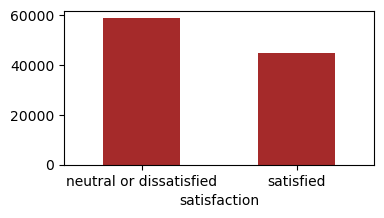

In [ ]:
fig = plt.figure(figsize=(4, 2))
ax = df_train.satisfaction.value_counts().plot(kind='bar',rot=0,color='brown')
df_train.satisfaction.value_counts(normalize=True)

Como podemos notar, las clases estan relativamente balanceadas, aunque predominan los usuarios insatisfechos o neutrales.

#### FEATURES

DISTRIBUCION: Lo primero que queremos observar es como se distribuyen las distintas variables que utilizaremos para la predicción

In [ ]:
num_dis= ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cualitativas_ord = ['Class','Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment',
                    'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']
cualitativas_nom = ['Gender', 'Customer Type','Type of Travel']

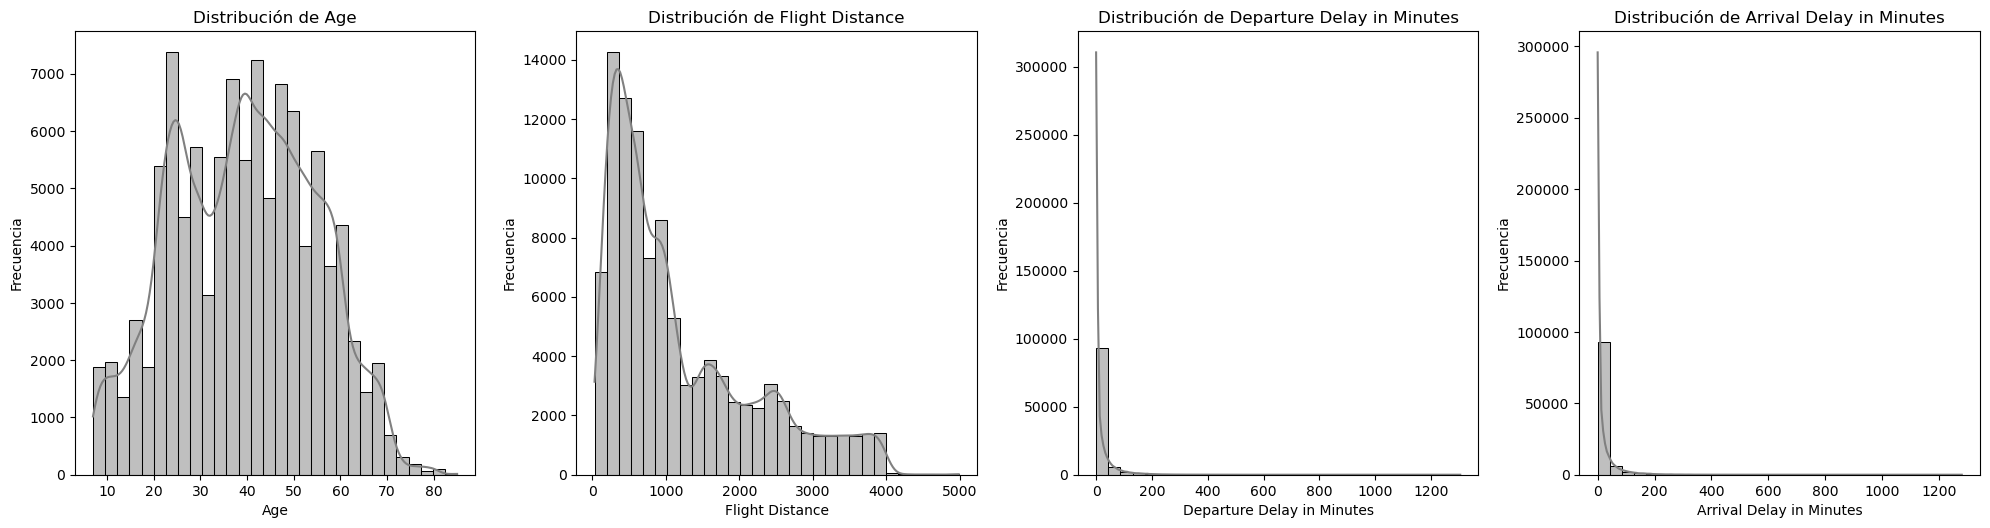

In [ ]:
# Distribución variables numéricas discretas
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(num_dis):
    row = i // ncols
    col_idx = i % ncols
    sns.histplot(df_train[col], kde=True, bins=30, ax=axes[row, col_idx], color='grey')
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

In [ ]:
REVISAR OPCION DE APLICAR EL LOGARITMO A VER COMO SE VE.

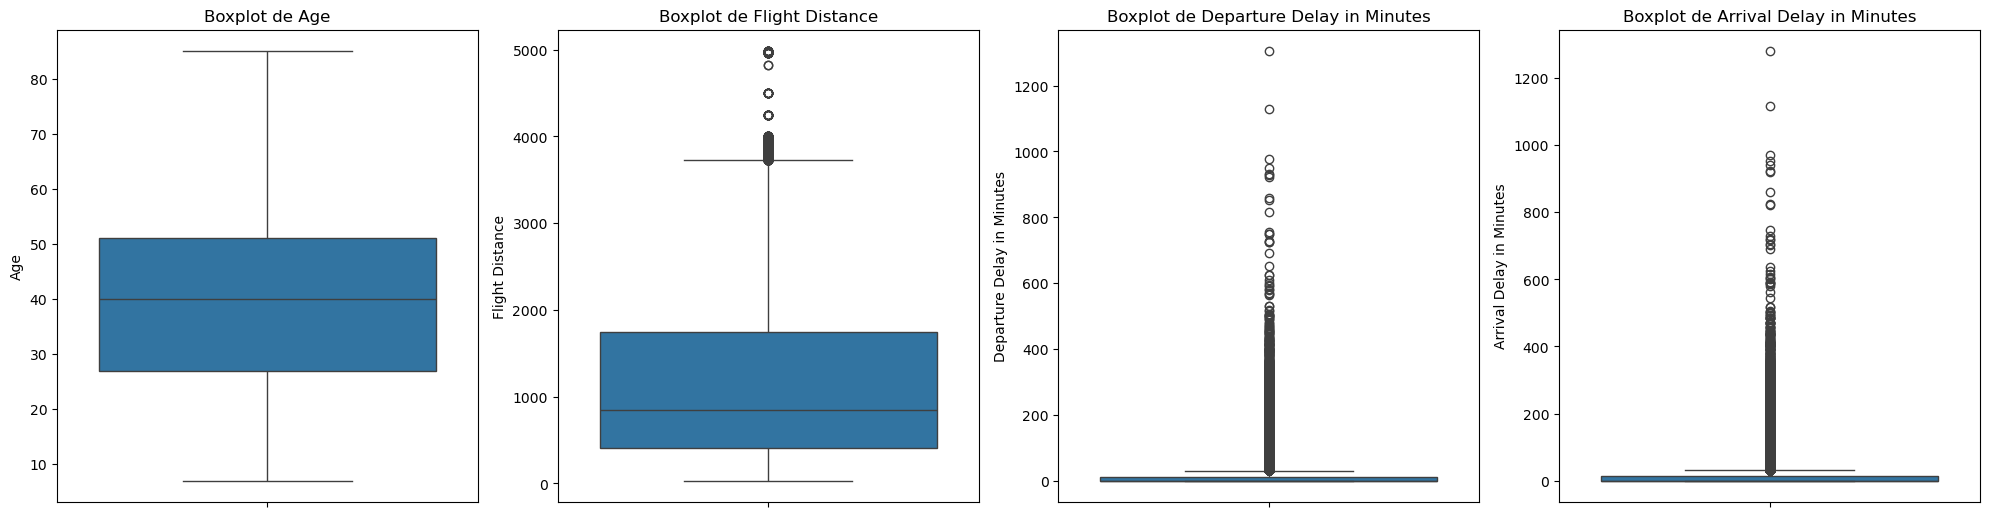

In [ ]:
#boxplot de las variables numéricas
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(num_dis):
    row = i // ncols
    col_idx = i % ncols
    sns.boxplot(y=col, data=df_train, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')
    axes[row, col_idx].set_ylabel(col)

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()



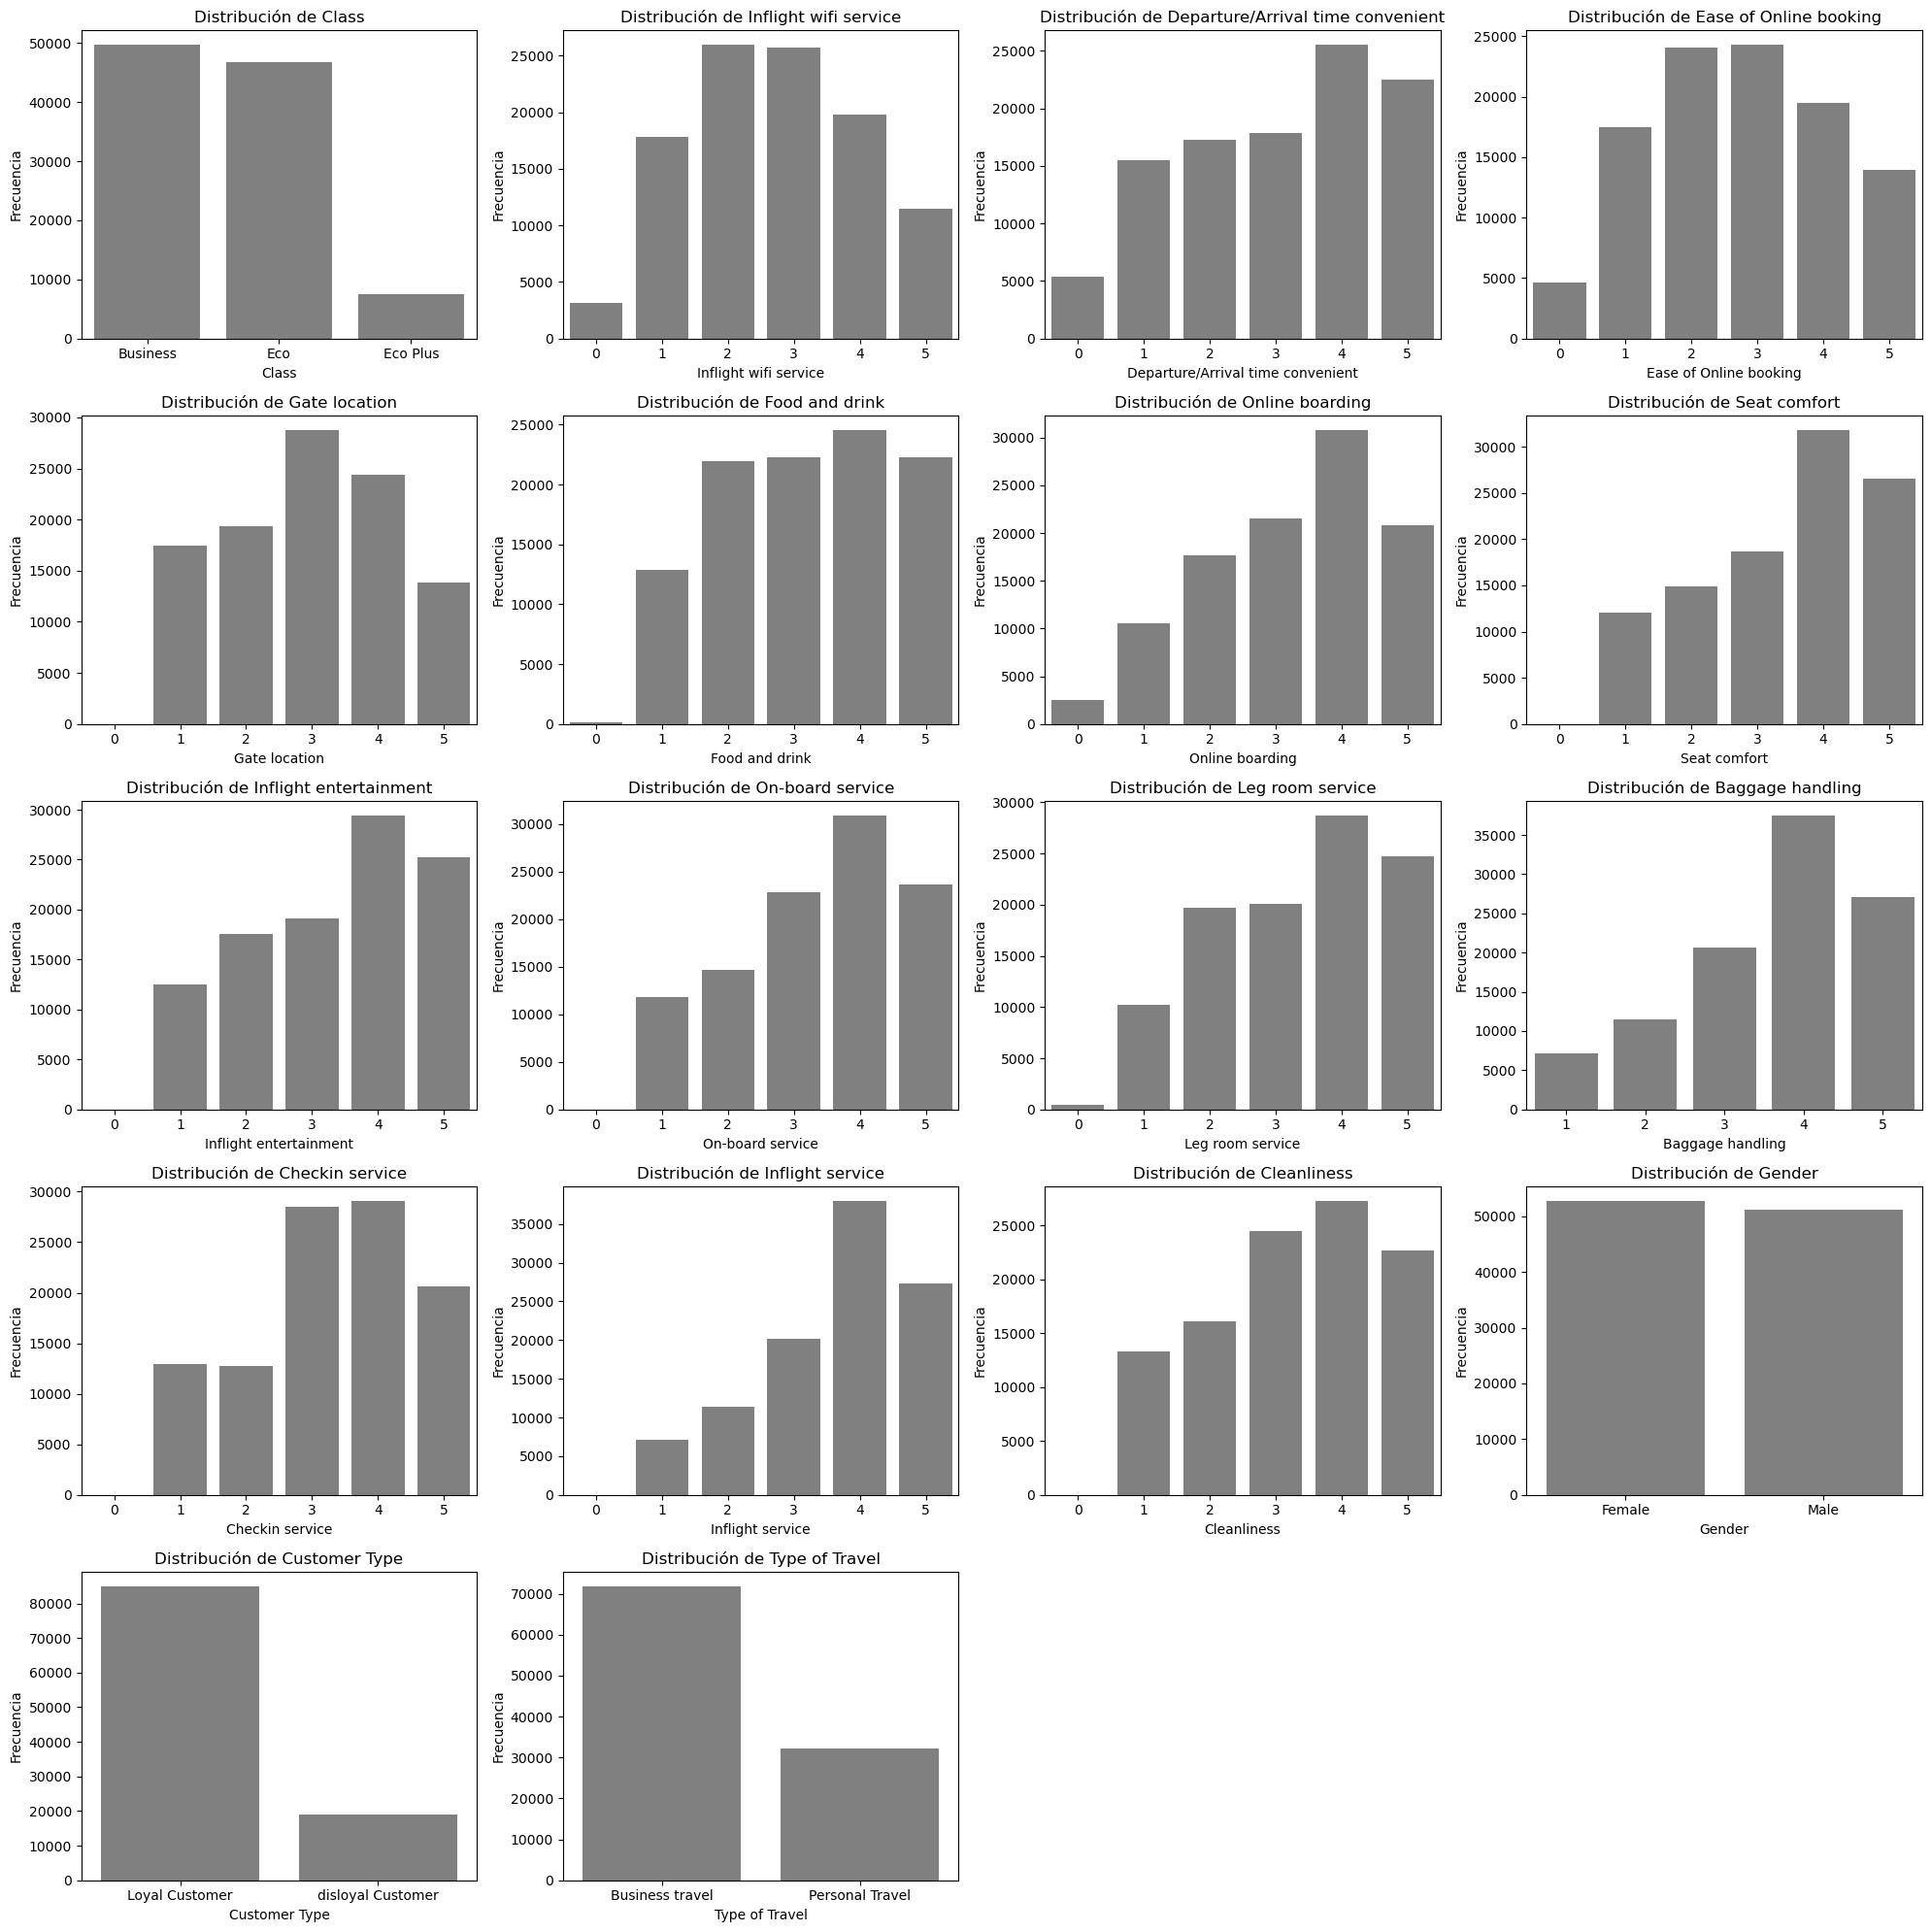

In [ ]:
# Distribución variables cualitativas
nrows, ncols = 5, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(cualitativas_ord+cualitativas_nom):
    row = i // ncols
    col_idx = i % ncols
    aux= pd.DataFrame(df_train[col].value_counts()).reset_index()
    aux.columns = [col, 'q']
    sns.barplot(x=col, y='q', data=aux, ax=axes[row, col_idx], color='grey')
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()


CONCLUSIONES:
- La mayoría de los usuarios viajan por trabajo y no por motivos personales.
- La distribución de hombres y mujeres está balanceada.
- La mayoría de los clientes son clientes leales.
- Muy pocos usuarios tienen como clase Eco Plus.
- En general, son pocos los pasajeros que votan algun servicio con 0.
- Respecto de la distancia, la aerolinea parece hacer mas vuelos cortos que largos.
- Las variables de demora en la salida y demora en la llegada, presentan en su distribución una cola pesada hacia la derecha

CORRELACION ENTRE LAS FEATURES

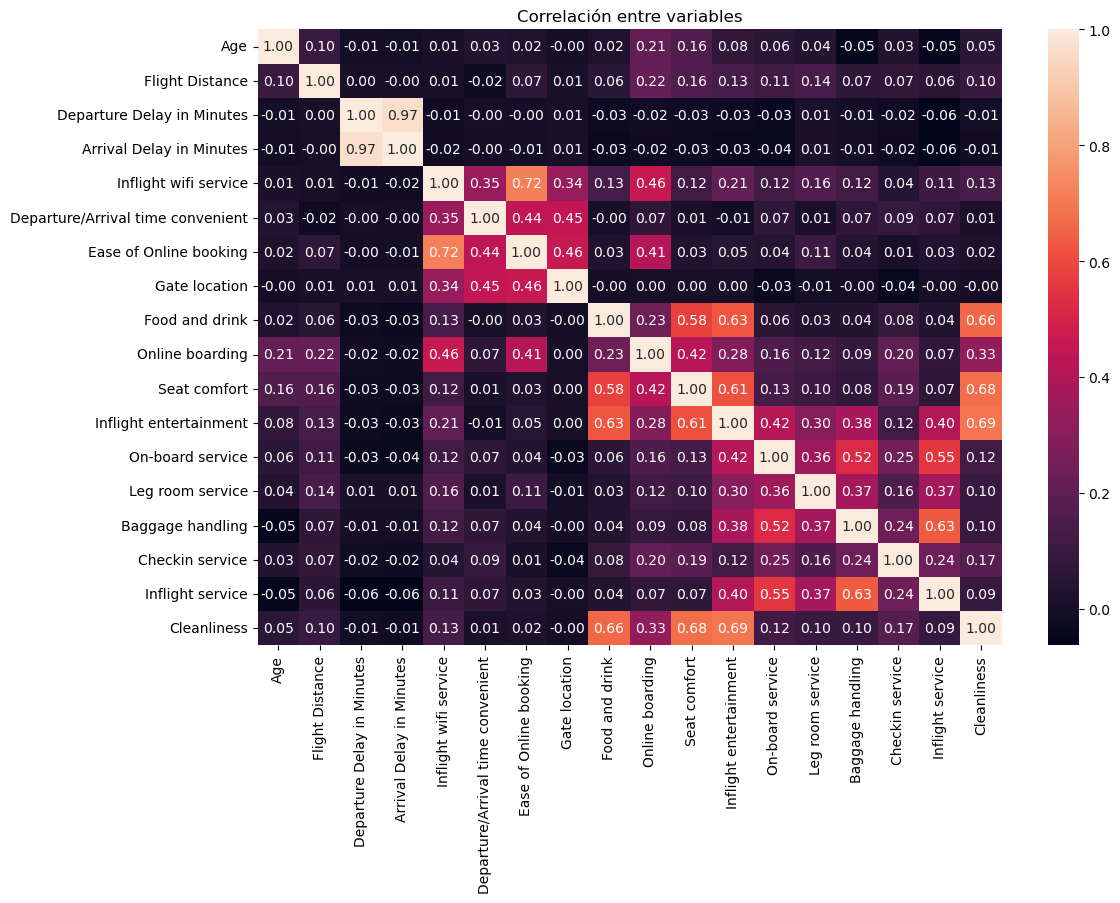

In [ ]:
# correlación seaborn entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[num_dis+ [i for i in cualitativas_ord if i not in ['Class']]].corr(), annot=True , fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

In [ ]:
AGREGAR EL TARGET.

CONCLUSIONES:
Como era de esperar, vemos una correlación muy alta entre la demora en salir y la demora en llegar en el avión.
Tambien se observa una correlación alta entre facilidad para la compra online y el servicio de wifi en el avión.
Ademas, se observa una alta correlación entre la limpieza y la conformidad en los alimentos, en la comodidad del asiento y en el entretenimiento a bordo.
Algo importante a destacar, es que no se observa correlación negativa alta entre ninguna feature.

ANALISIS BIVARIADO

In [ ]:
df_train['target']= np.where(df_train.satisfaction=='satisfied',1,0)

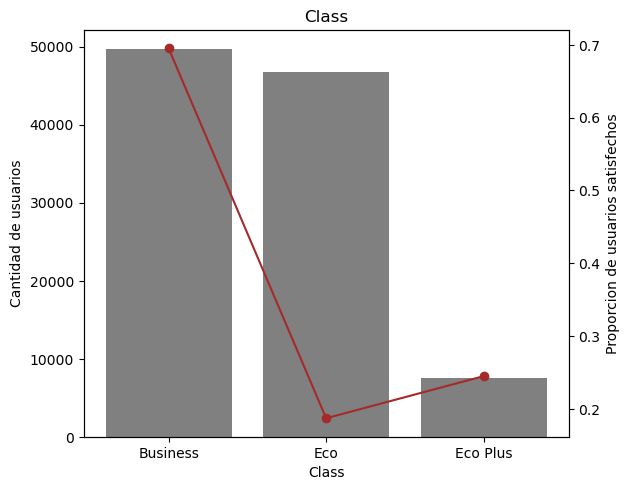

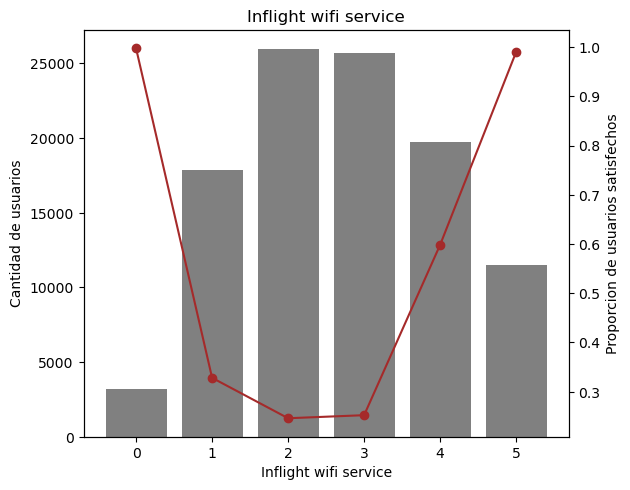

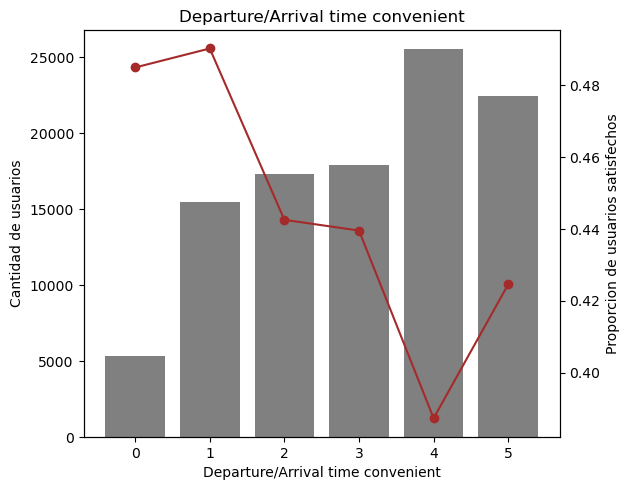

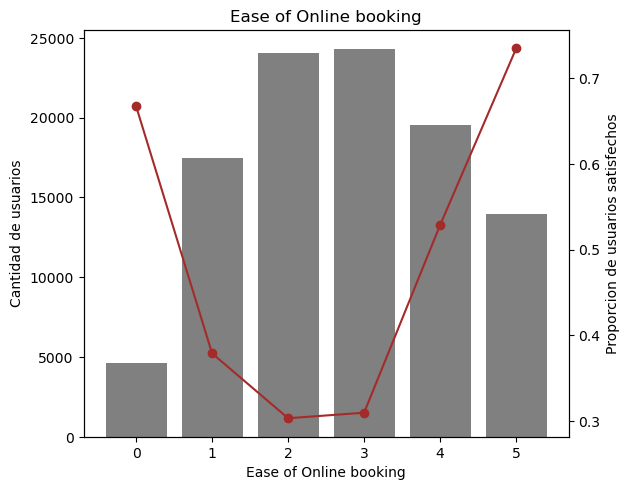

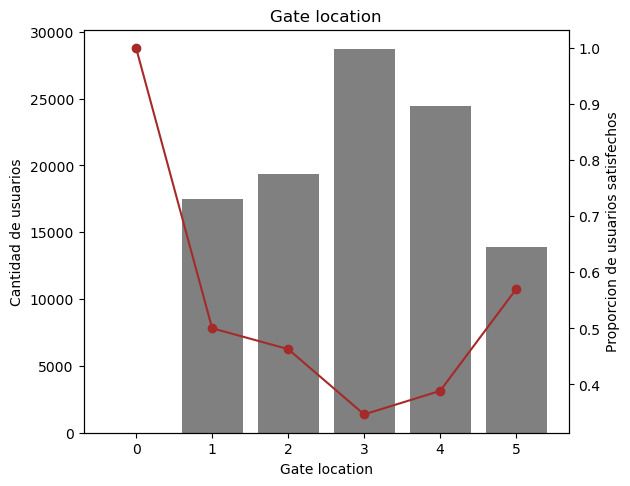

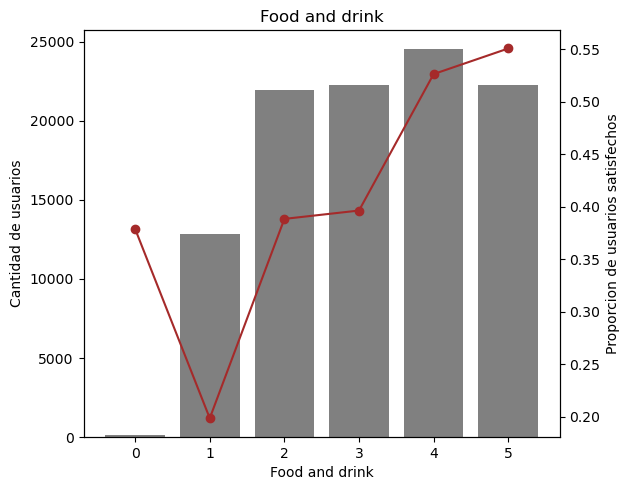

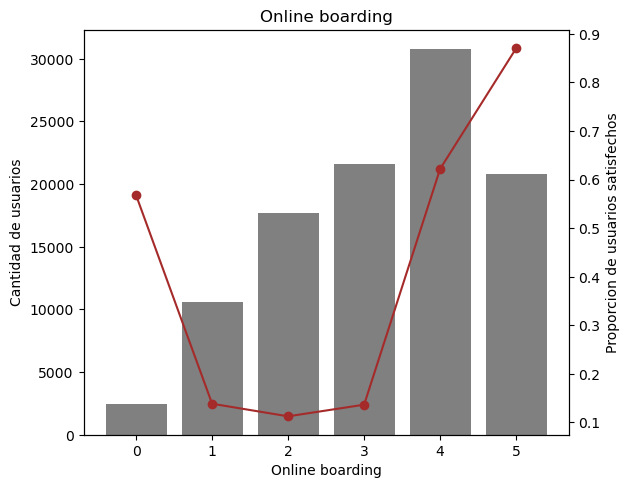

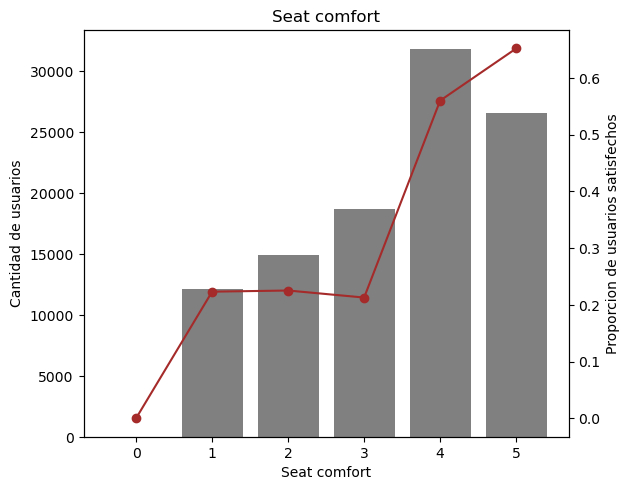

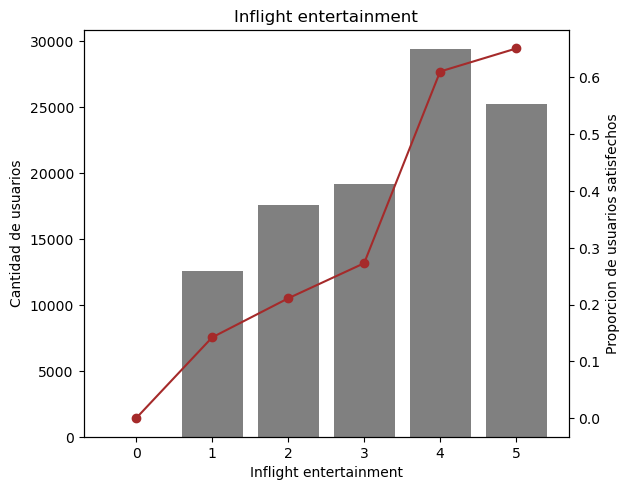

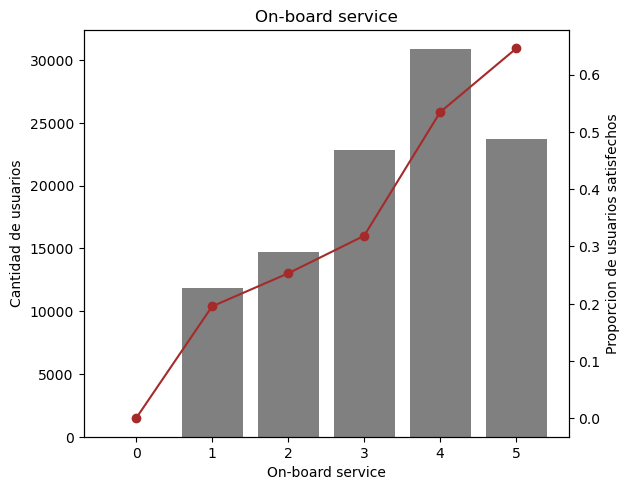

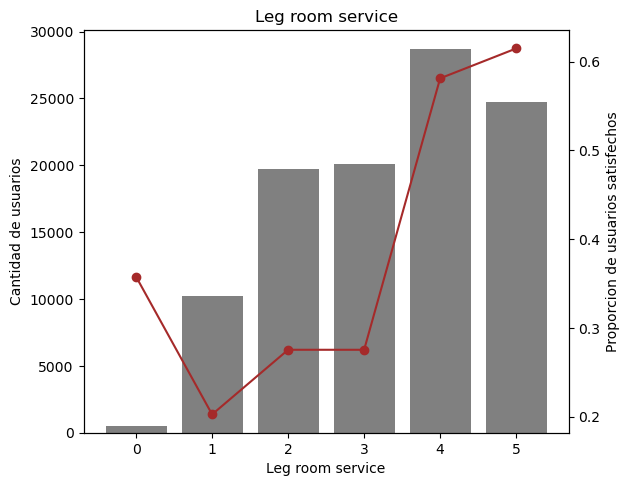

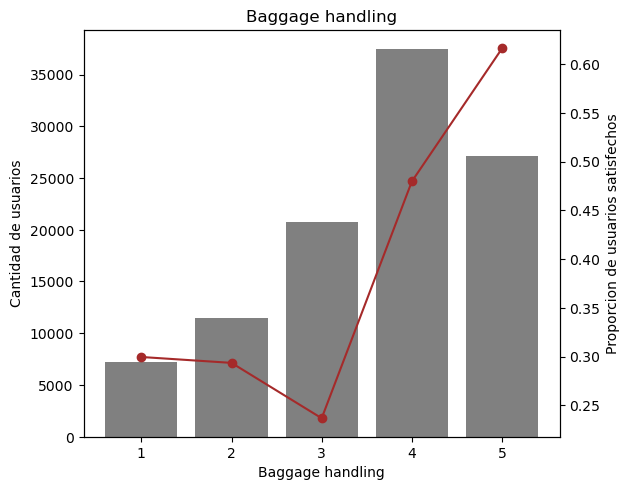

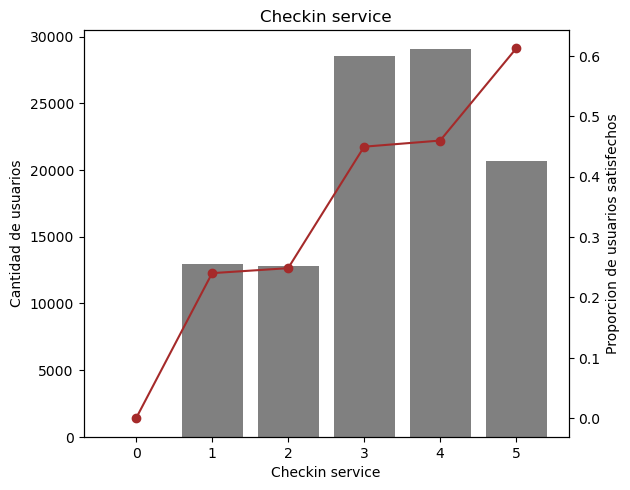

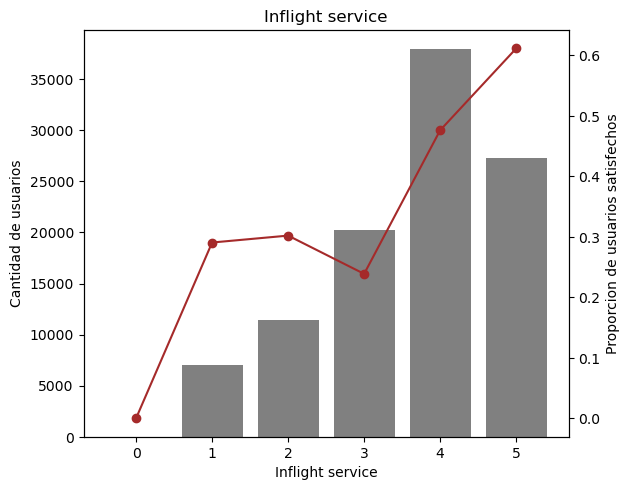

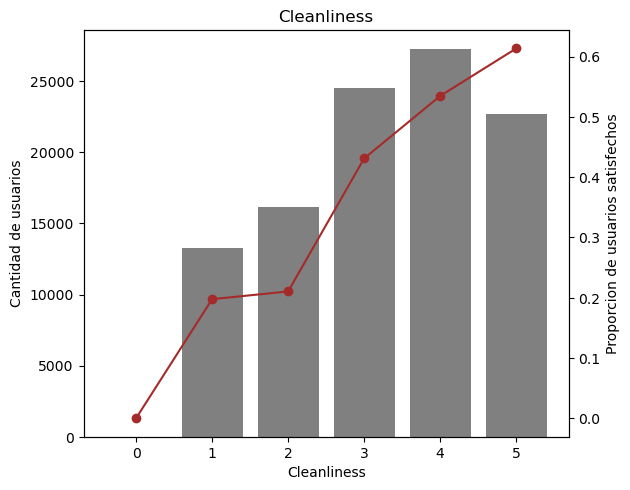

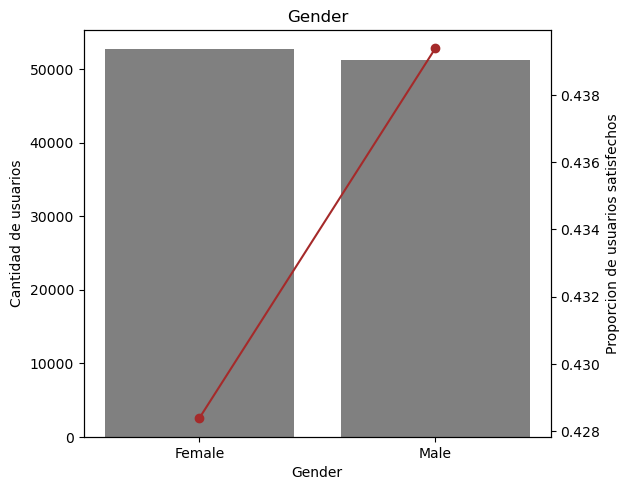

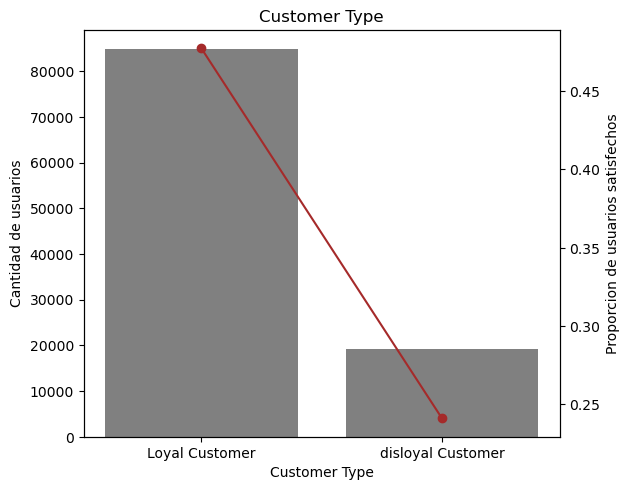

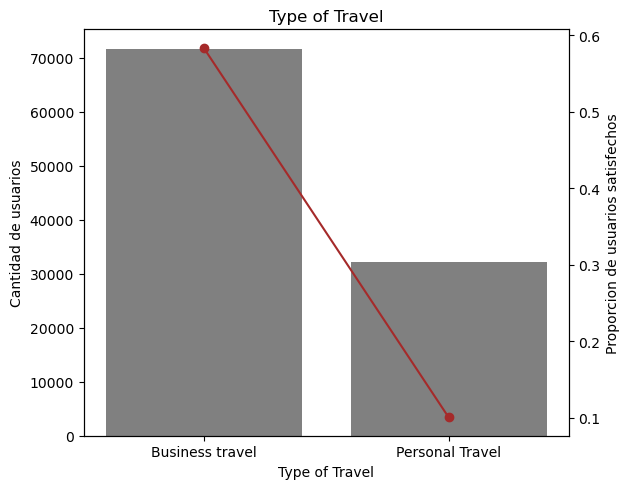

In [ ]:
for col in cualitativas_ord+cualitativas_nom:
    fig, ax1 = plt.subplots()
    a= pd.DataFrame(df_train.groupby(col).agg({'target':['count','sum']})).reset_index()
    a.columns= [col, 'q', 'target1']
    a['prop_target']= a['target1']/a['q']

    ax1.set_xlabel(col)
    ax1.set_ylabel('Cantidad de usuarios')
    ax1.bar(a[col], a['q'], color='grey')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Proporcion de usuarios satisfechos')
    ax2.plot(a[col], a['prop_target'], color='brown', marker='o')
    ax2.tick_params(axis='y')

    # Mostrar el gráfico
    fig.tight_layout()
    plt.title(col)
    plt.show()

/var/folders/0x/vf4h1h455gs9nw98sqt4b85c3qdrk0/T/ipykernel_68123/4058397823.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = pd.DataFrame(b.groupby('bins').agg({'target': ['count', 'sum']})).reset_index()


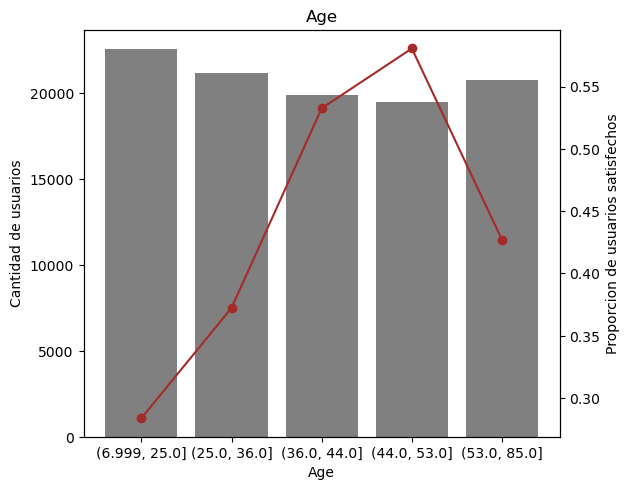

/var/folders/0x/vf4h1h455gs9nw98sqt4b85c3qdrk0/T/ipykernel_68123/4058397823.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = pd.DataFrame(b.groupby('bins').agg({'target': ['count', 'sum']})).reset_index()


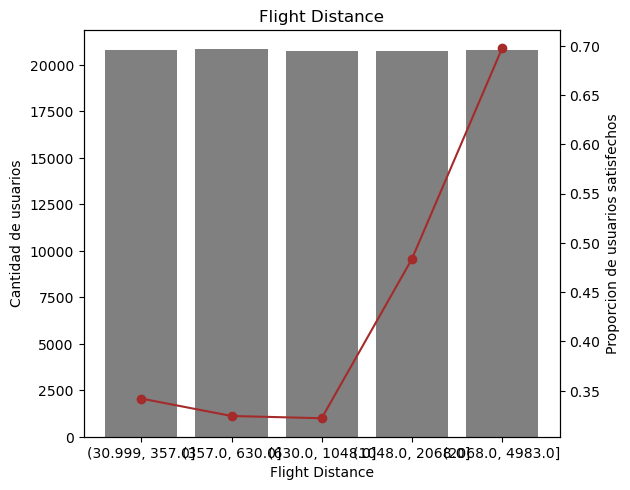

/var/folders/0x/vf4h1h455gs9nw98sqt4b85c3qdrk0/T/ipykernel_68123/4058397823.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = pd.DataFrame(b.groupby('bins').agg({'target': ['count', 'sum']})).reset_index()


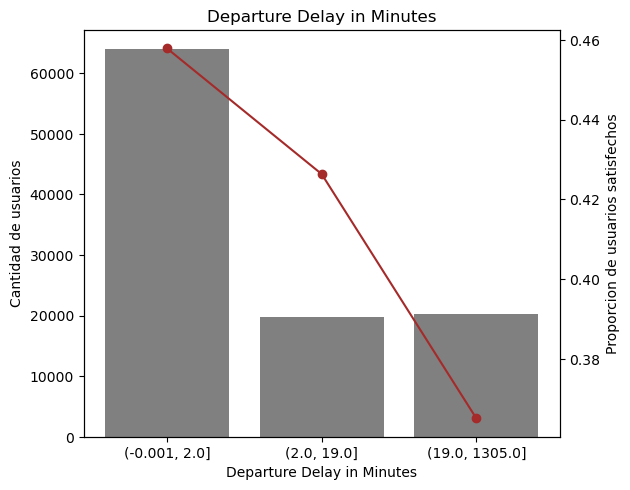

/var/folders/0x/vf4h1h455gs9nw98sqt4b85c3qdrk0/T/ipykernel_68123/4058397823.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = pd.DataFrame(b.groupby('bins').agg({'target': ['count', 'sum']})).reset_index()


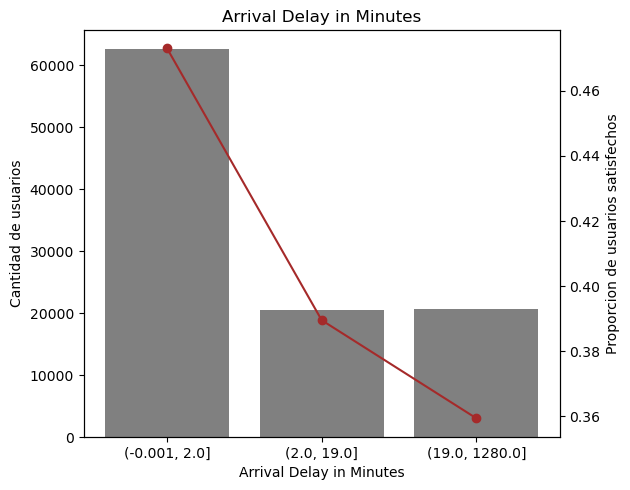

In [ ]:
for col in num_dis:
    fig, ax1 = plt.subplots()
    b = df_train.copy()
    b['bins'] = pd.qcut(df_train[col], q=5, duplicates='drop')
    a = pd.DataFrame(b.groupby('bins').agg({'target': ['count', 'sum']})).reset_index()
    a.columns = [col, 'q', 'target1']
    a['prop_target'] = a['target1'] / a['q']
    a_sorted = a.sort_values(by=col)

    ax1.set_xlabel(col)
    ax1.set_ylabel('Cantidad de usuarios')
    ax1.bar(a_sorted[col].astype(str), a_sorted['q'], color='grey')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Proporcion de usuarios satisfechos')
    ax2.plot(a_sorted[col].astype(str), a_sorted['prop_target'], color='brown', marker='o')
    ax2.tick_params(axis='y')

    fig.tight_layout()
    plt.title(col)
    plt.show()

### INGENIERIA DE FEATURES

DATOS FALTANTES

In [ ]:
missings = pd.DataFrame(df_train.isnull().sum()).reset_index()
missings.columns = ['Variable', 'Cantidad Missings']
missings['Proporcion Missings'] = missings['Cantidad Missings']/df_train.shape[0]
missings

,Variable,Cantidad Missings,Proporcion Missings
0,id,0,0.000000
1,Gender,0,0.000000
2,Customer Type,0,0.000000
3,Age,0,0.000000
4,Type of Travel,0,0.000000
5,Class,0,0.000000
6,Flight Distance,0,0.000000
7,Inflight wifi service,0,0.000000
8,Departure/Arrival time convenient,0,0.000000
9,Ease of Online booking,0,0.000000


<Axes: >

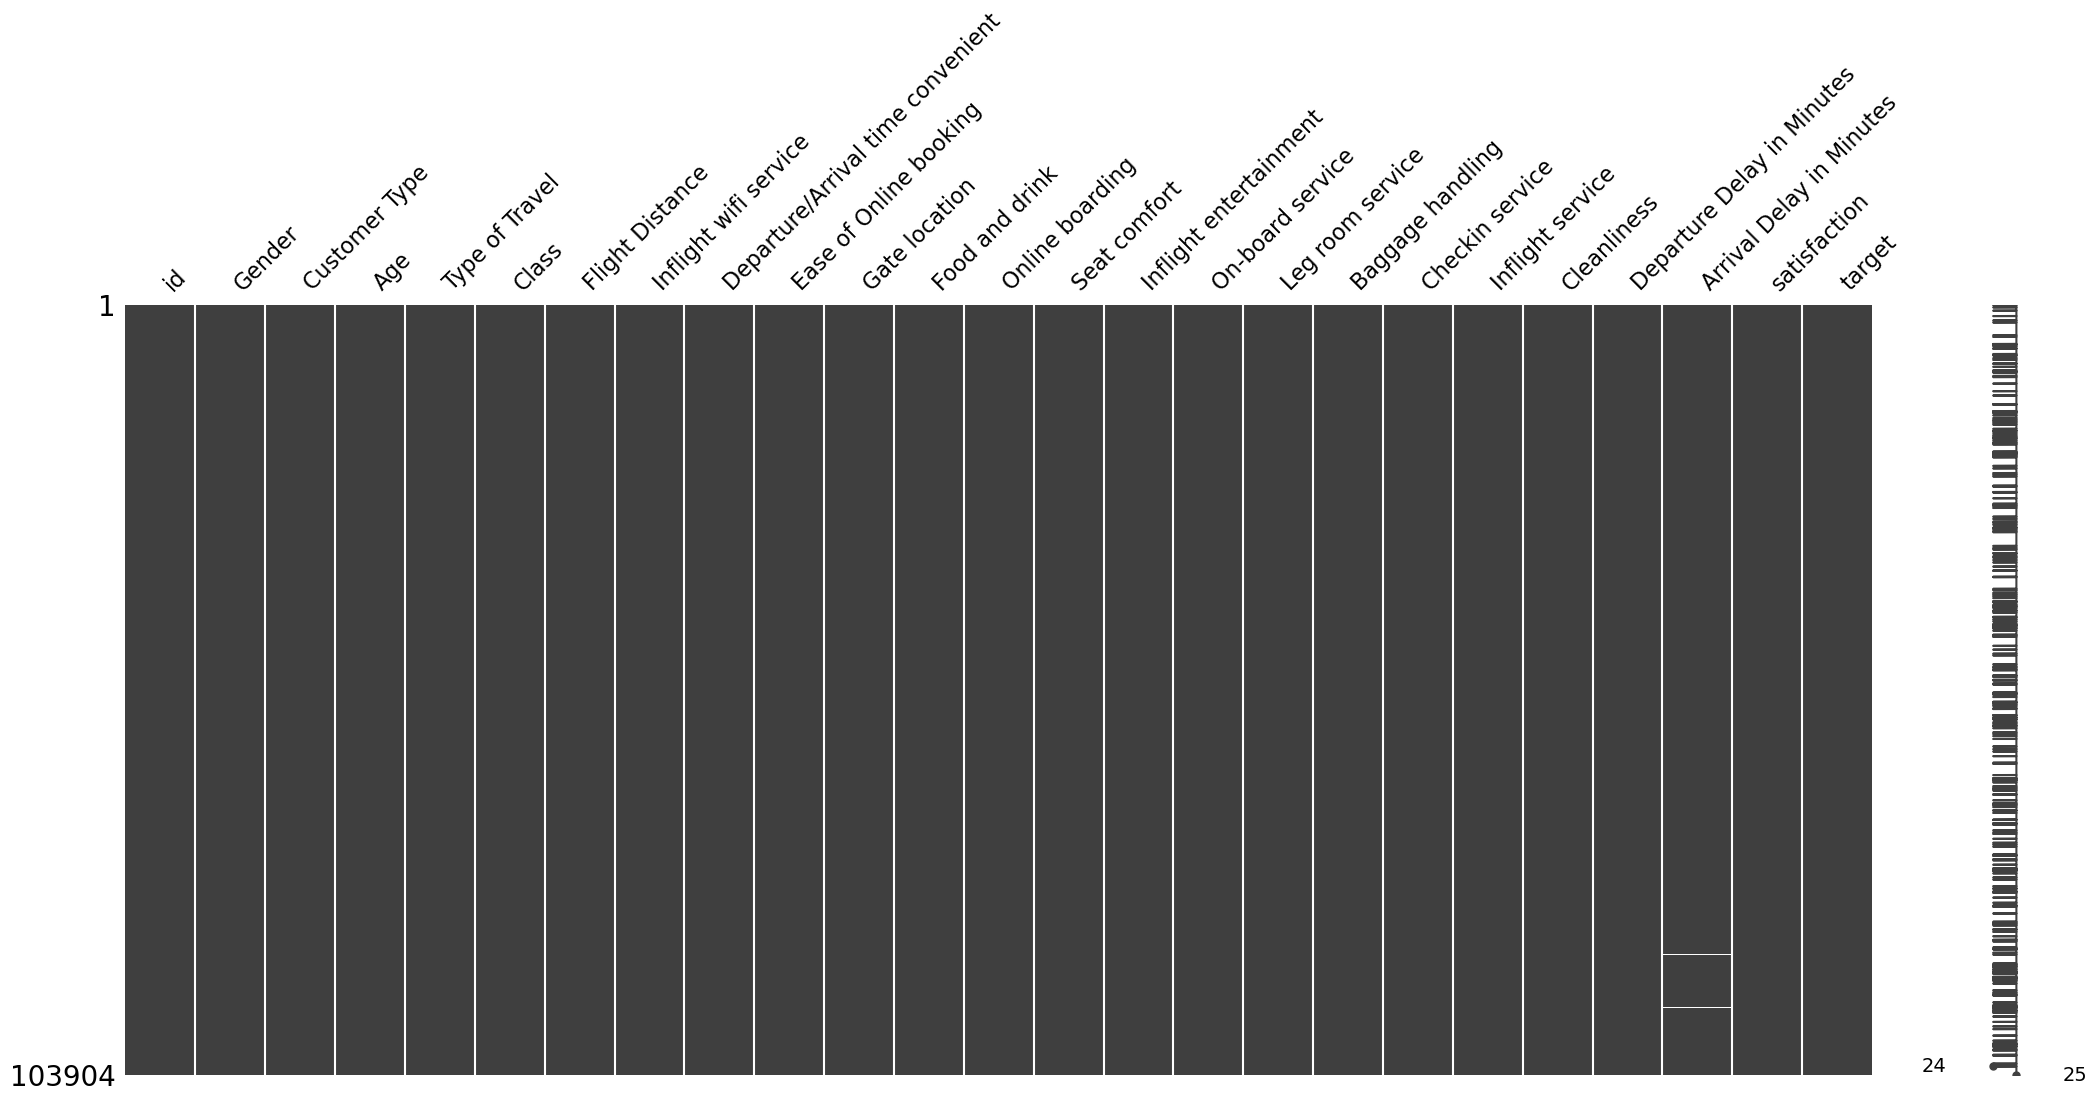

In [ ]:
# Vemos todas las columnas y cuáles tienen missings (para ver si hay alguna relación)
msno.matrix(df_train)

Como podemos observar, la única feature que tiene missings es Arrival Delay in Minutes.
Para imputar los missings, proponemos las siguientes opciones:
- Imputar por la media de la variable.
- Imputar el atraso en la salida al atraso en la llegada, ya que uno esperaría que si el avion se atrasa en la salida tambien se atrase en la llegada (lo cual ya se verificó cuando revisamos la correlacion entre ambas variables).
- Hacer un modelo para imputar el atraso en la llegada.

In [ ]:
imp_missings = df_train.copy()
imp_missings['Class'] = np.where(imp_missings['Class'] == 'Eco',1, np.where(imp_missings['Class'] == 'Eco Plus',2,3))
imp_missings['Arrival_imp1'] = imp_missings['Arrival Delay in Minutes'].fillna(imp_missings['Arrival Delay in Minutes'].mean())
imp_missings['Arrival_imp2'] = np.where(imp_missings['Arrival Delay in Minutes'].isnull(), imp_missings['Departure Delay in Minutes'], imp_missings['Arrival Delay in Minutes'])

In [ ]:
# Imputación con KNNImputer
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imp_missings[[i for i in num_dis + cualitativas_ord if i not in ['Arrival_imp1', 'Arrival_imp2']]])
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_knn = knn_imputer.fit_transform(scaled_features)
a= pd.DataFrame(columns = [i for i in num_dis + cualitativas_ord if i not in ['Arrival_imp1', 'Arrival_imp2']], data = scaler.inverse_transform(imputed_knn))
a['Arrival_imp3'] = a['Arrival Delay in Minutes'].astype('int')
a=a[['Arrival_imp3']]
imp_missings = imp_missings.join(a)
imp_missings['Arrival_imp3'] = imp_missings['Arrival_imp3'].astype('float')
imp_missings.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,target,Arrival_imp1,Arrival_imp2,Arrival_imp3
0,59520,Female,Loyal Customer,64,Personal Travel,3,965,3,5,3,3,5,5,5,1,1,3,1,5,1,5,11,4.0,neutral or dissatisfied,0,4.0,4.0,3.0
1,67390,Male,disloyal Customer,26,Business travel,3,592,2,1,1,2,3,1,3,3,5,4,5,4,4,3,112,125.0,neutral or dissatisfied,0,125.0,125.0,124.0
2,98693,Female,Loyal Customer,8,Personal Travel,1,993,3,4,3,1,4,3,4,4,4,5,5,4,4,4,0,0.0,neutral or dissatisfied,0,0.0,0.0,0.0
3,23386,Male,Loyal Customer,41,Business travel,3,2223,4,4,4,4,1,2,4,5,5,5,5,5,5,1,9,4.0,satisfied,1,4.0,4.0,3.0
4,67830,Female,disloyal Customer,19,Business travel,1,1235,4,4,4,4,3,4,3,3,1,2,4,1,4,3,0,0.0,neutral or dissatisfied,0,0.0,0.0,0.0


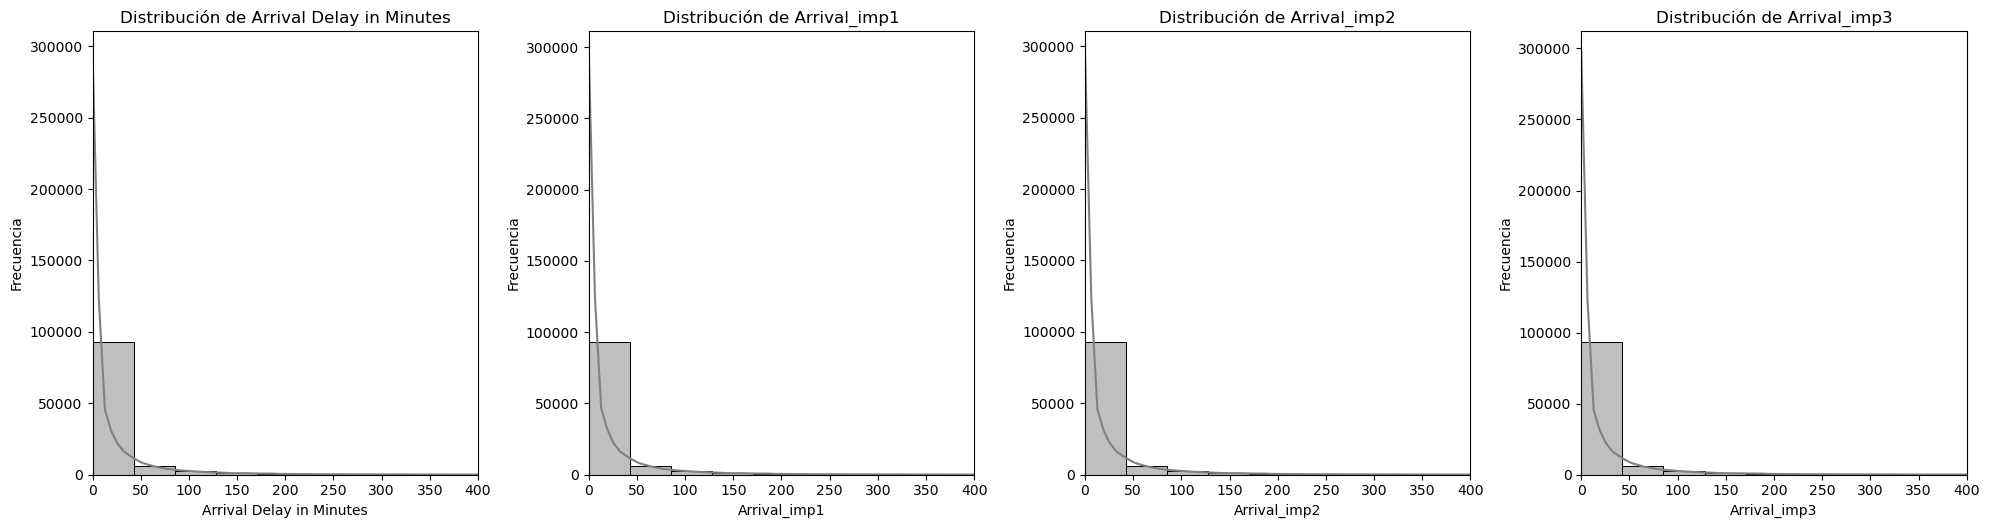

In [ ]:
# Distribución variables numéricas discretas
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(['Arrival Delay in Minutes', 'Arrival_imp1', 'Arrival_imp2', 'Arrival_imp3']):
    row = i // ncols
    col_idx = i % ncols
    sns.histplot(imp_missings[col], kde=True, bins=30, ax=axes[row, col_idx], color='grey')
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')
    axes[row, col_idx].set_xlim((0,400))

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

Las distribuciones se ven muy parecidas porque son muy pocos casos los que tienen missings. Vemos a detalle qué imputacion se hizo para tomar una decision:

In [ ]:
imp_missings[imp_missings['Arrival Delay in Minutes'].isnull()].head(30)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,target,Arrival_imp1,Arrival_imp2,Arrival_imp3
20,98765,Female,Loyal Customer,64,Personal Travel,1,1814,2,4,3,3,3,4,4,2,2,3,2,5,2,4,10,NaN,neutral or dissatisfied,0,15.102339,10.0,17.0
318,121137,Female,Loyal Customer,20,Business travel,3,2370,2,2,2,2,3,3,3,3,5,4,5,3,5,3,60,NaN,satisfied,1,15.102339,60.0,20.0
766,3449,Male,Loyal Customer,34,Personal Travel,1,213,2,4,2,4,3,2,3,3,5,4,5,4,5,3,0,NaN,neutral or dissatisfied,0,15.102339,0.0,4.0
1494,81145,Female,disloyal Customer,24,Business travel,3,1310,5,4,5,4,4,5,4,4,4,3,5,5,4,4,125,NaN,satisfied,1,15.102339,125.0,110.0
2089,73281,Female,Loyal Customer,60,Business travel,3,1197,1,1,1,1,2,4,5,4,4,5,4,4,4,3,24,NaN,satisfied,1,15.102339,24.0,4.0
2090,39998,Male,Loyal Customer,41,Business travel,3,618,5,5,5,5,4,4,4,3,3,3,3,5,3,5,0,NaN,satisfied,1,15.102339,0.0,2.0
2353,22007,Male,Loyal Customer,36,Personal Travel,1,503,2,5,4,4,5,4,5,5,4,3,4,3,5,5,0,NaN,neutral or dissatisfied,0,15.102339,0.0,0.0
4079,44820,Male,disloyal Customer,49,Personal Travel,1,491,5,4,5,2,3,5,3,3,1,4,3,3,4,3,0,NaN,satisfied,1,15.102339,0.0,0.0
4304,64304,Female,Loyal Customer,40,Business travel,3,2075,5,5,5,5,5,5,5,2,2,2,2,4,2,4,0,NaN,satisfied,1,15.102339,0.0,4.0
5262,103506,Female,Loyal Customer,14,Business travel,3,2515,5,5,5,5,4,4,4,4,4,2,4,5,4,4,8,NaN,satisfied,1,15.102339,8.0,1.0


TRATAMIENTO DE OUTLIERS

In [ ]:
# Detectamos outliers consierando como Outliers aquellos que superan 1.5 veces el rango intercuartilico
for column in num_dis:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = len(df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)])
    print(f"Columna: {column} - Límite inferior: {lower_bound} - Límite superior: {upper_bound} - Cantidad de outliers: {outliers}")


Columna: Age - Límite inferior: -9.0 - Límite superior: 87.0 - Cantidad de outliers: 0
Columna: Flight Distance - Límite inferior: -1576.0 - Límite superior: 3728.0 - Cantidad de outliers: 2363
Columna: Departure Delay in Minutes - Límite inferior: -18.0 - Límite superior: 30.0 - Cantidad de outliers: 14529
Columna: Arrival Delay in Minutes - Límite inferior: -19.5 - Límite superior: 32.5 - Cantidad de outliers: 13954


Probamos dos tipos de tratamientos:
1. Capear el percentil 95 de la distribución
2. Capear al rango intercuartilico
Posteriormente vemos cómo se ven las distribuciones para decidir con cuál nos quedamos

In [ ]:
#Capeo al percentil 95:
for col in ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    df_train[col + '_out1']= np.where(df_train[col]>df_train[col].quantile(0.95), df_train[col].quantile(0.95), df_train[col])

#Rango intercuartilico:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_train[col + '_out2'] = np.where(df_train[col]>upper_bound, upper_bound,np.where(df_train[col]<lower_bound,lower_bound, df_train[col]))

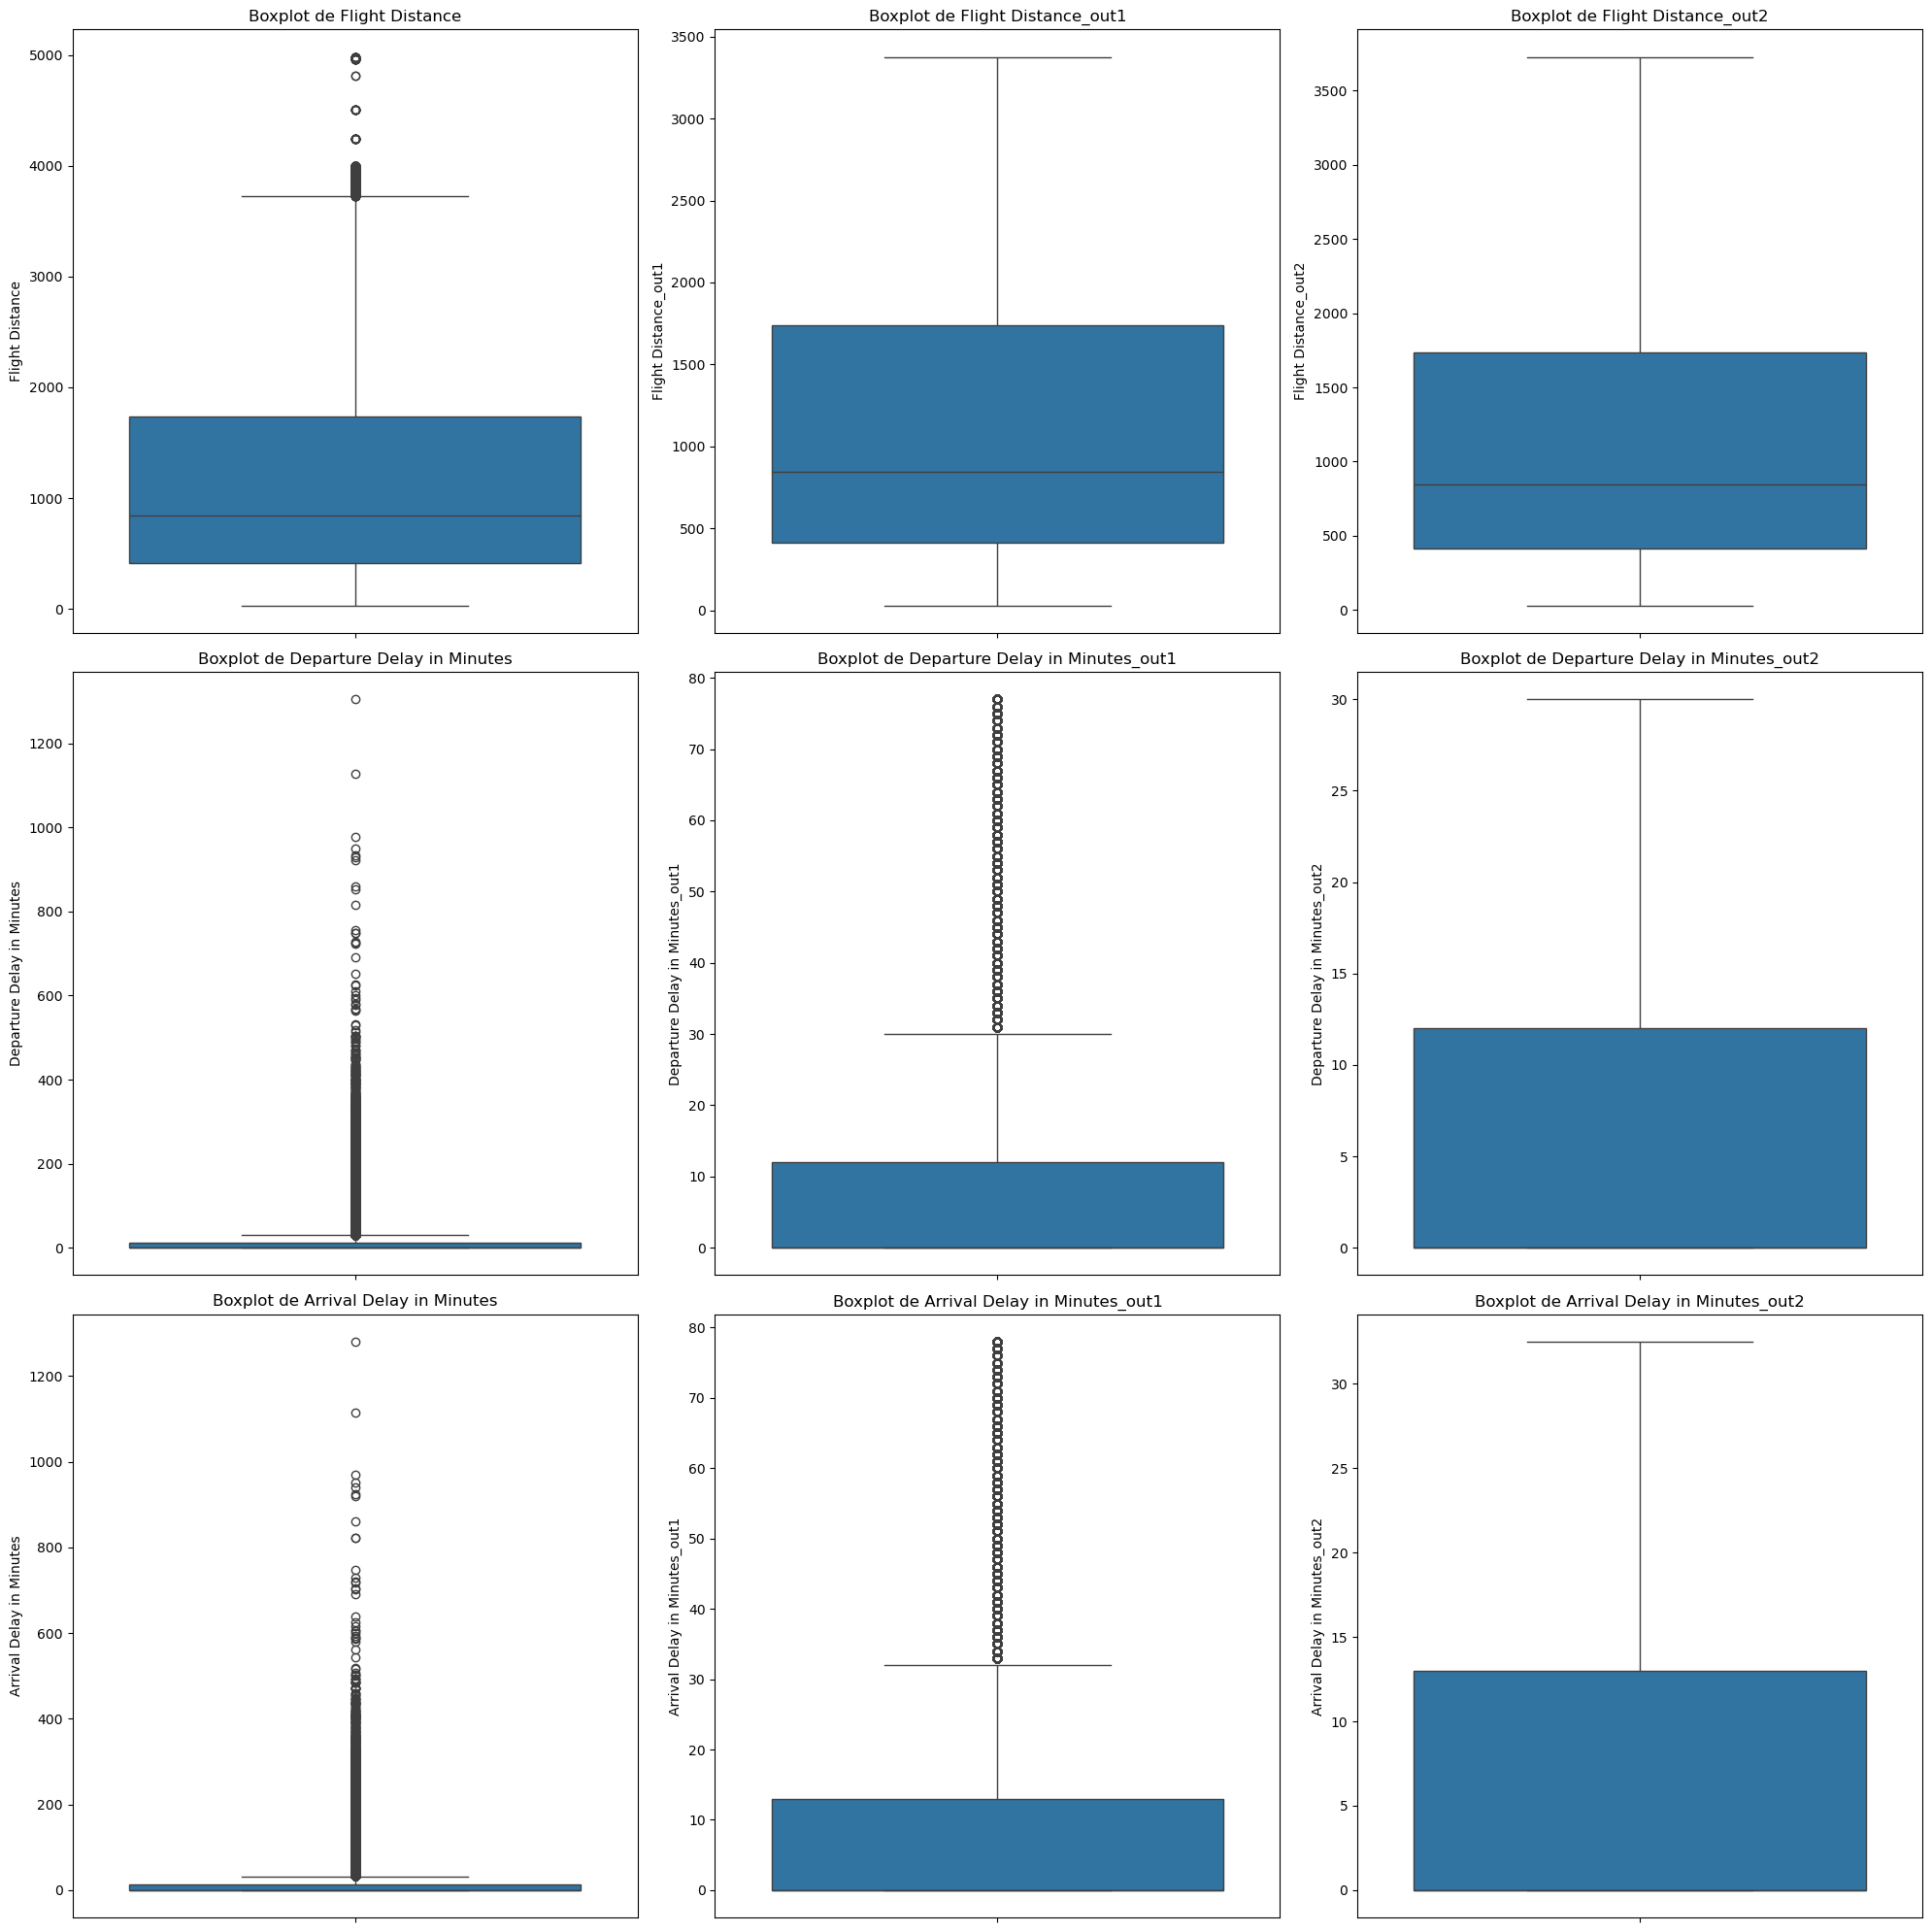

In [ ]:
#boxplot de las variables numéricas
nrows, ncols =3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(['Flight Distance','Flight Distance_out1','Flight Distance_out2',
                         'Departure Delay in Minutes','Departure Delay in Minutes_out1', 'Departure Delay in Minutes_out2',
                         'Arrival Delay in Minutes','Arrival Delay in Minutes_out1','Arrival Delay in Minutes_out2']):
    row = i // ncols
    col_idx = i % ncols
    sns.boxplot(y=col, data=df_train, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')
    axes[row, col_idx].set_ylabel(col)

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


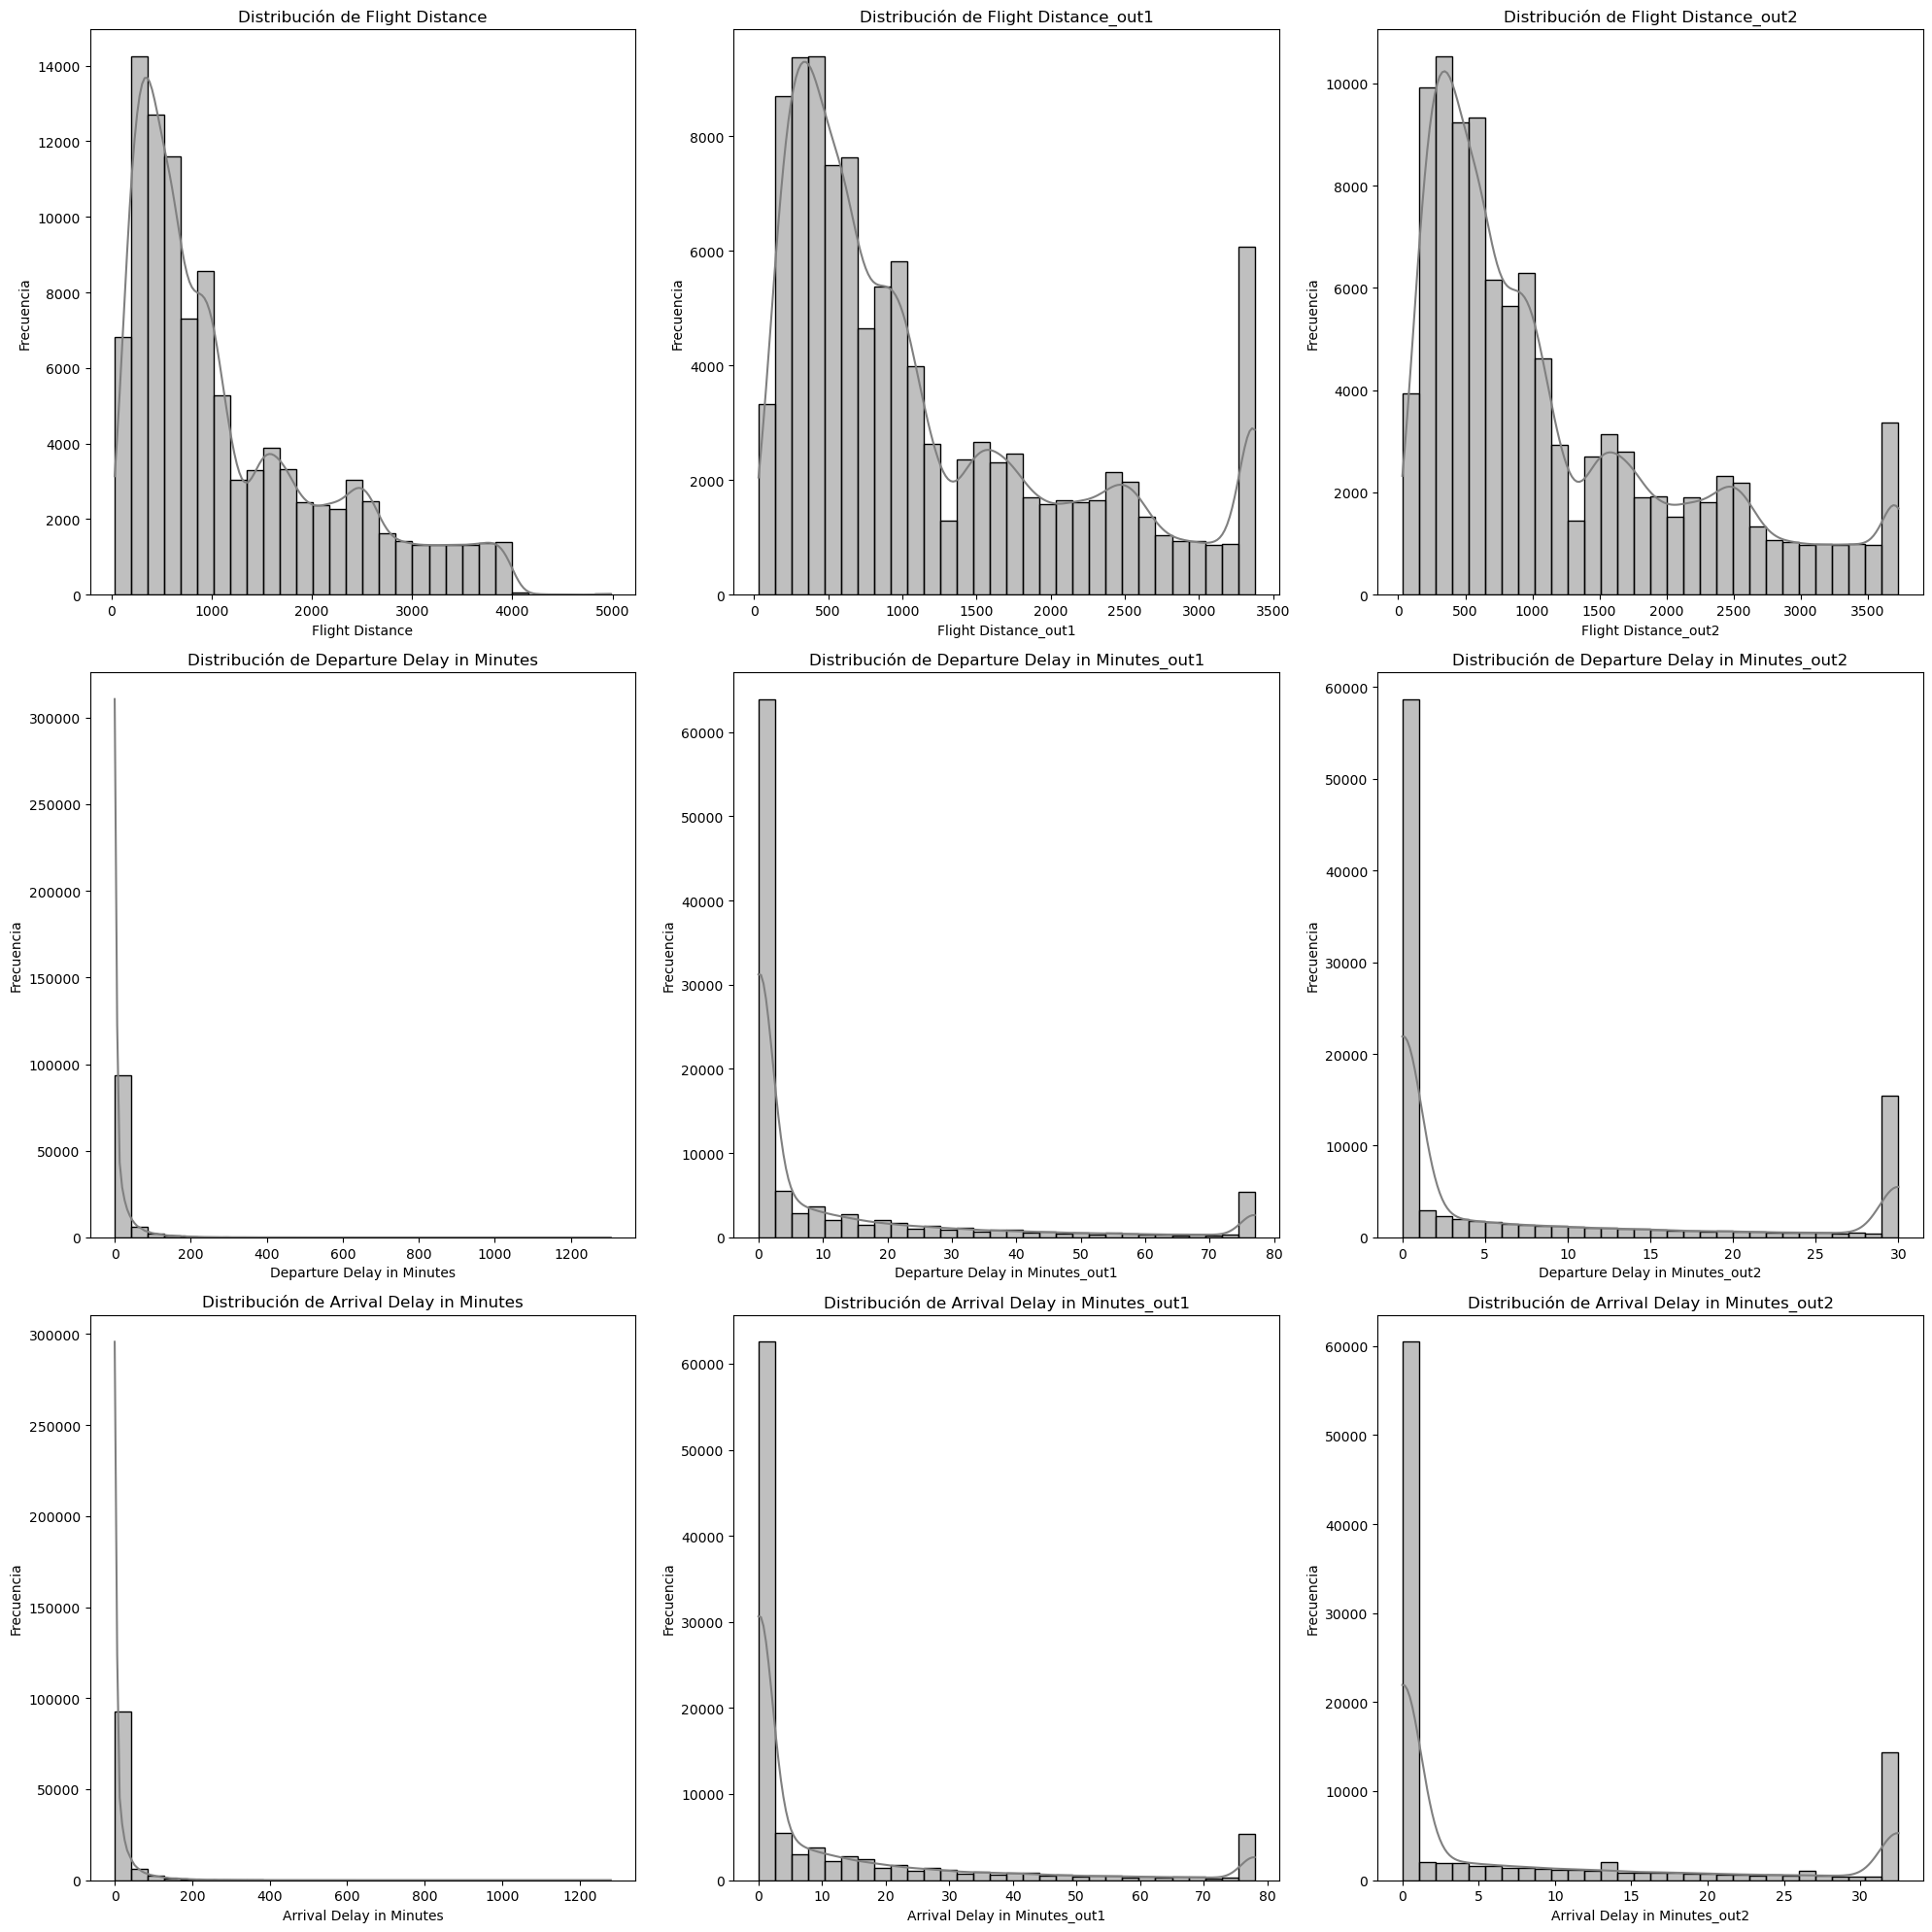

In [ ]:
# Distribución variables numéricas discretas
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(['Flight Distance','Flight Distance_out1','Flight Distance_out2',
                         'Departure Delay in Minutes','Departure Delay in Minutes_out1', 'Departure Delay in Minutes_out2',
                         'Arrival Delay in Minutes','Arrival Delay in Minutes_out1','Arrival Delay in Minutes_out2']):
    row = i // ncols
    col_idx = i % ncols
    sns.histplot(df_train[col], kde=True, bins=30, ax=axes[row, col_idx], color='grey')
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

CODIFICACION DE VARIABLES CATEGORICAS

SELECCION DE FEATURES

REDUCCION DE DIMENSIONALIDAD Y VER EL TARGET EN UN SCATTER